In [66]:
# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import keras
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
import tensorflow as tf

def tanhLU(x, alpha=1, beta=1,lamda=1):
    y=beta+alpha*lamda*(1-(tf.tanh(lamda*x)**2))
    return y

# Register the custom activation function
get_custom_objects().update({'tanhLU': Activation(tanhLU)})


df = pd.read_excel('SPT.xlsx')
data=np.array(df)
X=data[:,0:2]
y=data[:,2]
y=np.reshape(y,(X.shape[0],1))

# Load and preprocess data
from sklearn.model_selection import KFold
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X
y_train=y
sc = MinMaxScaler()
sc_y=MinMaxScaler()
X_train = sc.fit_transform(X_train)
#_test = sc.transform(X_test)
y_train=sc_y.fit_transform(y_train)
#y_test=sc_y.transform(y_test)
def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

# Define neural network model
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(5))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(y_train.shape[1]))


'''
# Define neural network model
model = Sequential()
model.add(Dense(100, activation='tanhLU', input_dim=X_train.shape[1]))
model.add(Dense(50, activation='tanhLU'))
model.add(Dense(5, activation='tanhLU'))
model.add(Dense(y_train.shape[1]))
'''
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

k = 8 # number of folds kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mse_list = []
mape_list = []
for train_index, test_index in kf.split(X_train):
  X_train_fold, X_test_fold = X_train[train_index],X_train[test_index]
  y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
  model.fit(X_train_fold, y_train_fold, batch_size=5, epochs=500,verbose=0)
  y_pred_fold = model.predict(X_test_fold)
  mse_fold = model.evaluate(X_test_fold, y_test_fold)
  mape_fold = mape(y_test_fold, y_pred_fold)
  mse_list.append(mse_fold)
  mape_list.append(mape_fold)
  print('mean absolute percentage error:', mape_fold)
mape_list = [value for value in mape_list if value != float('inf')]
mse_avg = np.mean(mse_list)
mape_avg = np.mean(mape_list)
print('Average mean squared error:', mse_avg)
print('Average mean absolute percentage error:', mape_avg)

1/1 [==============================] - 0s 137ms/step - loss: 0.0119
mean absolute percentage error: 11.588453625992
1/1 [==============================] - 0s 29ms/step - loss: 0.0016
mean absolute percentage error: inf


<ipython-input-66-61489e776468>:41: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


1/1 [==============================] - 0s 27ms/step - loss: 0.0018
mean absolute percentage error: 10.830901396075596
1/1 [==============================] - 0s 26ms/step - loss: 3.2832e-04
mean absolute percentage error: 7.028555751421946
1/1 [==============================] - 0s 45ms/step - loss: 2.1587e-04
mean absolute percentage error: 2.7586469939279166
1/1 [==============================] - 0s 30ms/step - loss: 9.4291e-06
mean absolute percentage error: 0.40214956971073534
1/1 [==============================] - 0s 28ms/step - loss: 5.9623e-04
mean absolute percentage error: 7.943852262165136
1/1 [==============================] - 0s 29ms/step - loss: 1.3681e-04
mean absolute percentage error: 2.125255410399568
Average mean squared error: 0.00207723977302976
Average mean absolute percentage error: 6.096830715670415


In [ ]:
# plot and save your model
import tensorflow as tf
img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               300       
                                                                 
 dense_41 (Dense)            (None, 50)                5050      
                                                                 
 dense_42 (Dense)            (None, 5)                 255       
                                                                 
 dense_43 (Dense)            (None, 1)                 6         
                                                                 
Total params: 5611 (21.92 KB)
Trainable params: 5611 (21.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
import pickle
model.save('model.h5')
pickle.dump(sc, open('scaler.pkl', 'wb'))
pickle.dump(sc_y, open('scaler_y.pkl', 'wb'))

In [79]:
# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.metrics import MeanAbsolutePercentageError

df = pd.read_excel('SPT.xlsx')
data=np.array(df)
X=data[:,0:2]
y=data[:,2]
y=np.reshape(y,(X.shape[0],1))

# Load and preprocess data
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
sc = MinMaxScaler()
sc_y=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)
def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

# Define neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))


model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss='mse', metrics=['mape'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=500, verbose=1)




Epoch 1/500
3/3 [==============================] - 1s 111ms/step - loss: 0.2757 - mape: 3416836.7500 - val_loss: 0.4435 - val_mape: 88.4683
Epoch 2/500
3/3 [==============================] - 0s 27ms/step - loss: 0.2318 - mape: 8562334.0000 - val_loss: 0.3852 - val_mape: 80.2865
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 0.1976 - mape: 12666876.0000 - val_loss: 0.3416 - val_mape: 75.9837
Epoch 4/500
3/3 [==============================] - 0s 28ms/step - loss: 0.1794 - mape: 15775898.0000 - val_loss: 0.3086 - val_mape: 77.5801
Epoch 5/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1624 - mape: 18316120.0000 - val_loss: 0.2877 - val_mape: 78.5259
Epoch 6/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1497 - mape: 20117876.0000 - val_loss: 0.2745 - val_mape: 79.0168
Epoch 7/500
3/3 [==============================] - 0s 27ms/step - loss: 0.1398 - mape: 20910454.0000 - val_loss: 0.2648 - val_mape: 79.2063
Epoch 8/500
3/3 [====

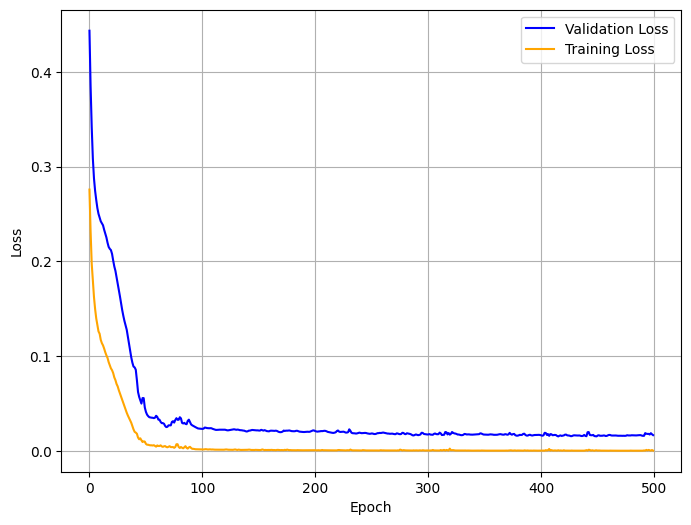

In [80]:
import matplotlib.pyplot as plt

# Assuming you have 'history' containing training history (loss) from your model.fit() call
# history = model.fit(X_train_fold, y_train_fold, batch_size=5, epochs=500, verbose=0)

# Plot validation loss and training loss on the same graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pickle
model.save('model.h5')
pickle.dump(sc, open('scaler.pkl', 'wb'))
pickle.dump(sc_y, open('scaler_y.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#predict value#predict all value
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import keras

df = pd.read_excel('SPT.xlsx')
data=np.array(df)
X=data[:,0:2]
y=data[:,2]
y=np.reshape(y,(X.shape[0],1))

# Load and preprocess data
from sklearn.model_selection import KFold

X_train=X
y_train=y

#X_train = sc.fit_transform(X_train)
#y_train=sc_y.fit_transform(y_train)



#model1 = keras.models.load_model('model.h5')
#scaler_x = pickle.load(open('scaler.pkl', 'rb'))
#scaler_y = pickle.load(open('scaler_y.pkl', 'rb'))
x = X_train
x_scale=sc.transform(x)
y_scale=model.predict(x_scale)
#y_scale=np.reshape(y_scale,(1,1))
y=sc_y.inverse_transform(y_scale) #state parameter
#calculate for friction angle
fee=34.821-27.512*y

#predict(X_train)
#print('friction angle =',SPT_fee(stress=363,N=60), 'degree')


1/1 [==============================] - 0s 76ms/step


In [ ]:
mape(y,y_train)

15.281147619926742

In [ ]:
y

array([[ 0.03237078],
       [ 0.06543198],
       [ 0.04300151],
       [ 0.06490438],
       [ 0.08565575],
       [ 0.08159401],
       [-0.04407087],
       [-0.00899945],
       [-0.00703863],
       [ 0.03346611],
       [ 0.02846671],
       [-0.10883228],
       [-0.06992418],
       [-0.06992418],
       [-0.04876912],
       [-0.03458589],
       [-0.014311  ]], dtype=float32)

In [ ]:
y_train

array([[ 0.07046233],
       [ 0.10234465],
       [ 0.05877166],
       [ 0.07425114],
       [ 0.10029862],
       [ 0.10716516],
       [-0.03881704],
       [-0.00693019],
       [ 0.00966791],
       [ 0.0340507 ],
       [ 0.03862928],
       [-0.10925634],
       [-0.0655215 ],
       [-0.0705835 ],
       [-0.04696137],
       [-0.02369362],
       [-0.01124502]])

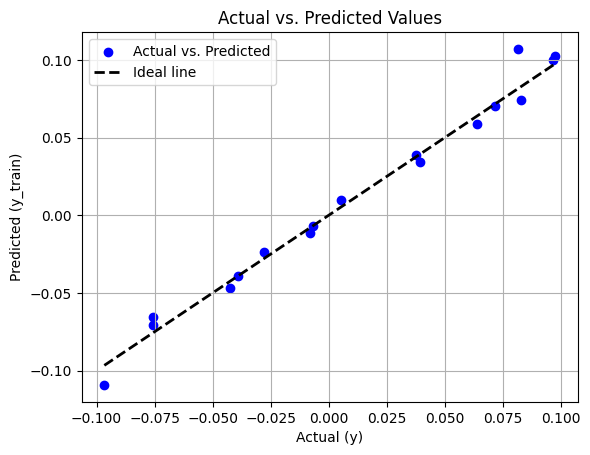

In [ ]:
plt.scatter(y, y_train, color='b', label='Actual vs. Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, label='Ideal line')

plt.xlabel('Actual (y)')
plt.ylabel('Predicted (y_train)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a DataFrame
df = pd.DataFrame(y,  y_train)

# Export to CSV
df.to_csv('y_and_y_predict.csv', index=False)

ValueError: Index data must be 1-dimensional

In [ ]:
   filename='predict.csv'
   df = pd.DataFrame({"y_true": y.flatten(), "y_predicted": y_train.flatten()})
   df.to_csv(filename, index=False)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_train)


0.9825487920788214

In [ ]:
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import keras
def SPT_fee(stress=100, N=50):
  #model1 = keras.models.load_model('model.h5')
  #scaler_x = pickle.load(open('scaler.pkl', 'rb'))
  #scaler_y = pickle.load(open('scaler_y.pkl', 'rb'))
  x = np.array([stress,N])
  x=np.reshape(x,(1,2))
  x_scale=sc.transform(x)
  y_scale=model.predict(x_scale)
  y_scale=np.reshape(y_scale,(1,1))
  y=sc_y.inverse_transform(y_scale) #state parameter
  #calculate for friction angle
  fee=34.821-27.512*y
  return fee[0,0]
print('friction angle =',SPT_fee(stress=200,N=50), 'degree')

1/1 [==============================] - 0s 36ms/step
friction angle = 37.700684 degree
